Profundidad del árbol: 6
Número de nodos terminales: 8
Accuracy: 0.9629629629629629
mae: 0.037037037037037035
mse: 0.037037037037037035
rmse: 0.19245008972987526
              precision    recall  f1-score   support

     class 0       1.00      0.96      0.98        23
     class 1       0.95      0.95      0.95        19
     class 2       0.92      1.00      0.96        12

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.96      0.96      0.96        54



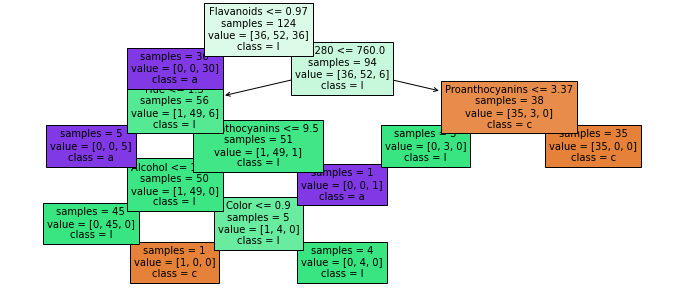

In [39]:
#EJERCICIO 1/MODELO 1: Decision Tree Classification 
#Crea por lo menos dos modelos de clasificación diferentes para intentar predecir lo mejor las clases del archivo adjunto.


import pandas as pd

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#Cargando data
wine = pd.read_csv('wineData.txt', sep=",", header=None)
wine.columns = ["clase","Alcohol","Malic", "Ash", "Alcalinity", "Magnesium", "phenols", "Flavanoids", "Nonflavanoid","Proanthocyanins", "Color", "Hue", "OD280","Proline"]
wine.head()

#split dataset in features and target variable
feature_cols = ['Alcohol','Malic', 'Ash', 'Alcalinity', 'Magnesium', 'phenols', 'Flavanoids', 'Nonflavanoid','Color', 'Hue', 'OD280','Proline']
X = wine[feature_cols] # Features
y = wine.clase # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

#Building Decision Tree Model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Estructura del árbol creado
from matplotlib import pyplot as plt
from sklearn.tree._export import plot_tree
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")
plot = plot_tree(
            decision_tree = clf,
            feature_names = wine.drop(columns = "clase").columns,
            class_names   = 'clase',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#--------------------------------------------
#EJERCICIO 2: evaluación de modelos
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

from sklearn.metrics import classification_report
y_true=y

target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))




0.9814814814814815
mae: 0.018518518518518517
mse: 0.018518518518518517
rmse: 0.13608276348795434
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        39
           2       0.94      1.00      0.97        15

    accuracy                           0.98        54
   macro avg       0.97      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



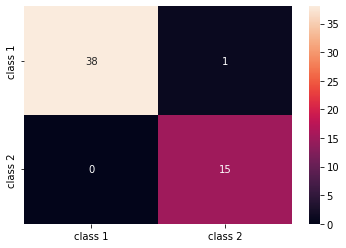

In [36]:
#EJERCICIO 1/MODELO 2: K-Nearest Neighbors with Scikit-Learn

#Cargando data
wine = pd.read_csv('wineData.txt', sep=",", header=None)
wine.columns = ["clase","Alcohol","Malic", "Ash", "Alcalinity", "Magnesium", "phenols", "Flavanoids", "Nonflavanoid","Proanthocyanins", "Color", "Hue", "OD280","Proline"]
wine.head()
# Creating 2 categories
wine["claseCat"] = pd.qcut(wine['clase'], 2, retbins=False, labels=[1, 2])
y3 = wine['claseCat']
X3 = wine.drop(['clase', 'claseCat'], axis = 1)

#División de datos

from sklearn.model_selection import train_test_split

SEED = 92
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=SEED)
#Escalado de características para la clasificación
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X3_train)

X3_train = scaler.transform(X3_train)
X3_test = scaler.transform(X3_test)
#Entrenamiento y predicción para la clasificación
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X3_train, y3_train)
y3_pred = classifier.predict(X3_test)
acc3 =  classifier.score(X3_test, y3_test)

#Ejercicio 2: evaluación de modelos
print(acc3) 


mae3 = mean_absolute_error(y3_test, y3_pred)
mse3 = mean_squared_error(y3_test, y3_pred)
rmse3 = mean_squared_error(y3_test, y3_pred, squared=False)

print(f'mae: {mae3}')
print(f'mse: {mse3}')
print(f'rmse: {rmse3}')

from sklearn.metrics import classification_report, confusion_matrix
#importing Seaborn's to use the heatmap 
import seaborn as sns

# Adding classes names for better interpretation
classes_names = ['class 1','class 2']
cm = pd.DataFrame(confusion_matrix(y3_test, y3_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y3_test, y3_pred))



In [30]:
#Ejercicio 4
#Compara su rendimiento utilizando la aproximación traicionando/test o cross-validation.

#  Validación cruzada k fold Decision Tree Model
from sklearn.model_selection import KFold


kfold_validacion = KFold(10) 
 
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(clf, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados 

#  Validación cruzada Clasificación K-Nearest Neighbors

from sklearn.model_selection import KFold


kfold_validacion2 = KFold(10) # Acá indicamos cuantos fold queremos. En nuestro caso elegimos 10.and
 
from sklearn.model_selection import cross_val_score

resultados = cross_val_score(classifier, X3, y3, cv = kfold_validacion2)
print(resultados)
resultados.mean() # para ver el promedio de los resultados 

[1.         0.83333333 0.88888889 0.61111111 0.77777778 0.94444444
 0.88888889 0.72222222 0.88235294 0.94117647]
[0.94444444 0.77777778 0.94444444 0.77777778 0.61111111 0.77777778
 0.77777778 0.55555556 0.35294118 0.23529412]


0.6754901960784314

In [45]:
#Ejercicio 5
#Aplica algún proceso de ingeniería para mejorar los resultados (normalización, estandarización, muestreo...)
#Check the number of rows and columns and their types
wine.info()
# Convert categorical variables to string
cat_vars = ['clase', 'Magnesium']
wine[cat_vars] = wine[cat_vars].astype(str)
wine.info()
# Check properties of numeric fields
wine.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   clase            178 non-null    object 
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    object 
 6   phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoid     178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  OD280            178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 19.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 

,Alcohol,Malic,Ash,Alcalinity,phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [53]:
# Feature Engineering
from scipy.stats import mode 
wine2 = wine.groupby(['clase','Magnesium']).agg(
                                                                             median_no_of_clicks_per_session=('Alcohol', 'median'),
                                                                             min_no_of_clicks_per_session=('Alcohol', 'max'),
                                                                             max_no_of_clicks_per_session=('Alcohol', 'min'),
                                                                             median_price=('Proline', 'median'),
                                                                             min_price=('Proline', 'max'),
                                                                             max_price=('Proline', 'min'),
                                                                             most_frequent_Malic=('Malic', lambda x: mode(x)[0][0]),
                                                                             most_frequent_Ash=('Ash', lambda x: mode(x)[0][0]),
                                                                             most_frequent_phenols=('phenols', lambda x: mode(x)[0][0]),
                                                                             most_frequent_Flavanoids=('Flavanoids', lambda x: mode(x)[0][0]),
                                                                             most_frequent_Nonflavanoid =('Nonflavanoid', lambda x: mode(x)[0][0]),
                                                                             most_frequent_Proanthocyanins =('Proanthocyanins', lambda x: mode(x)[0][0])
                                                                            )
wine2

median_no_of_clicks_per_session  \
clase Magnesium                                    
1     100                                 13.340   
      101                                 13.730   
      102                                 13.835   
      103                                 13.670   
      104                                 13.680   
...                                          ...   
3     94                                  12.600   
      95                                  13.710   
      96                                  12.730   
      97                                  12.985   
      98                                  13.230   

                 min_no_of_clicks_per_session  max_no_of_clicks_per_session  \
clase Magnesium                                                               
1     100                               13.48                         13.20   
      101                               13.90                         13.16   
      102                               14.38                         12.93   
      103                               14.10                         13.24   
      104                               13.68                         13.68   
...                                       ...                           ...   
3     94                                12.60                         12.60   
      95                                13.71                         13.71   
      96                                14.13                         12.20   
      97                                13.52                         12.45   
      98                                14.34                         12.81   

                 median_price  min_price  max_price  most_frequent_Malic  \
clase Magnesium                                                            
1     100               985.0       1050        920                 1.78   
      101              1095.0       1285        985                 1.50   
      102              1167.5       1547        770                 1.87   
      103               870.0       1060        680                 2.02   
      104               990.0        990        990                 1.83   
...                       ...        ...        ...                  ...   
3     94                695.0        695        695                 2.46   
      95                740.0        740        740                 5.65   
      96                537.5        600        510                 2.81   
      97                700.0        880        520                 3.03   
      98                660.0        675        560                 1.68   

                 most_frequent_Ash  most_frequent_phenols  \
clase Magnesium                                             
1     100                     2.14                   2.65   
      101                     2.12                   2.61   
      102                     2.28                   2.41   
      103                     2.29                   2.64   
      104                     2.36                   2.42   
...                            ...                    ...   
3     94                      2.20                   1.62   
      95                      2.45                   1.68   
      96                      2.32                   1.25   
      97                      2.64                   1.55   
      98                      2.28                   1.15   

                 most_frequent_Flavanoids  most_frequent_Nonflavanoid  \
clase Magnesium                                                         
1     100                            2.76                        0.26   
      101                            2.88                        0.17   
      102                            2.41                        0.25   
      103                            2.63                        0.32   
      104                            2.69                        0.42   
...               

In [59]:
# One hot encoding - to convert categorical data to continuous
cat_vars = ['most_frequent_Malic',
           'most_frequent_Ash', 'most_frequent_phenols',
           'most_frequent_Flavanoids', 'most_frequent_Nonflavanoid',
           'most_frequent_Proanthocyanins']
wine2[cat_vars] = wine2[cat_vars].astype(str)
wine3 = pd.get_dummies(wine2)
wine3.head(5)

# Standardizing
from sklearn.preprocessing import StandardScaler
con_vars = ['median_no_of_clicks_per_session', 'min_no_of_clicks_per_session',
           'max_no_of_clicks_per_session', 'median_price', 'min_price',
           'max_price']
scaler = StandardScaler()
wine3[con_vars]=scaler.fit_transform(wine3[con_vars])
wine3.head(5)

median_no_of_clicks_per_session  \
clase Magnesium                                    
1     100                               0.340889   
      101                               0.840568   
      102                               0.975097   
      103                               0.763694   
      104                               0.776506   

                 min_no_of_clicks_per_session  max_no_of_clicks_per_session  \
clase Magnesium                                                               
1     100                            0.262315                      0.352762   
      101                            0.790154                      0.305626   
      102                            1.393398                      0.034599   
      103                            1.041506                      0.399897   
      104                            0.513667                      0.918384   

                 median_price  min_price  max_price  most_frequent_Malic_0.74  \
clase Magnesium                                                                 
1     100            0.684956   0.678813   0.608682                         0   
      101            1.046785   1.419452   0.818702                         0   
      102            1.285263   2.245186   0.124019                         0   
      103            0.306680   0.710330  -0.166779                         0   
      104            0.701403   0.489714   0.834858                         0   

                 most_frequent_Malic_0.89  most_frequent_Malic_0.94  \
clase Magnesium                                                       
1     100                               0                         0   
      101                               0                         0   
      102                               0                         0   
      103                               0                         0   
      104                               0                         0   

                 most_frequent_Malic_0.98  ...  \
clase Magnesium                            ...   
1     100                               0  ...   
      101                               0  ...   
      102                               0  ...   
      103                               0  ...   
      104                               0  ...   

                 most_frequent_Proanthocyanins_2.18  \
clase Magnesium                                       
1     100                                         0   
      101                                         0   
      102                                         0   
      103                                         0   
      104                                         0   

                 most_frequent_Proanthocyanins_2.29  \
clase Magnesium                                       
1     100                                         0   
      101                                         0   
      102                                         0   
      103                                         0   
      104                                         0   

                 most_frequent_Proanthocyanins_2.34  \
clase Magnesium                                       
1     100                                         0   
      101                                         0   
      102                                         0   
      103                                         0   
      104                                         0   

                 most_frequent_Proanthocyanins_2.38  \
clase Magnesium                                       
1     100                                         0   
      101                                         0   
      102                                         0   
      103                                         0   
      104                                         0   

                 most_frequent_Proanthocyanins_2.5  \
clase Magnesium                                      
1     100                    